<a href="https://colab.research.google.com/github/pulkit2001/DL-Labs-Sem-5/blob/master/DL_Lab_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!wget https://github.com/JWarmenhoven/ISLR-python/raw/master/Notebooks/Data/Advertising.csv

--2020-09-02 09:25:33--  https://github.com/JWarmenhoven/ISLR-python/raw/master/Notebooks/Data/Advertising.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv [following]
--2020-09-02 09:25:33--  https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5166 (5.0K) [text/plain]
Saving to: ‘Advertising.csv.1’

Advertising.csv.1   100%[===================>]   5.04K  --.-KB/s    in 0s      

2020-09-02 09:25:34 (64.7 MB/s) - ‘Advertising.csv.1’ saved [5166

In [30]:
import pandas as pd
data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.isnull().values.any()

False

In [5]:
sales_type = []
for i in data.Sales:
  if i>=15:
    sales_type.append("High")
  elif i>=5 and i<=15 :
    sales_type.append("Medium")
  else:
    sales_type.append("Low")

In [31]:
data['Sales_type'] = sales_type
data

,Unnamed: 0,TV,Radio,Newspaper,Sales,Sales_type
0,1,230.1,37.8,69.2,22.1,High
1,2,44.5,39.3,45.1,10.4,Medium
2,3,17.2,45.9,69.3,9.3,Medium
3,4,151.5,41.3,58.5,18.5,High
4,5,180.8,10.8,58.4,12.9,Medium
...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,Medium
196,197,94.2,4.9,8.1,9.7,Medium
197,198,177.0,9.3,6.4,12.8,Medium
198,199,283.6,42.0,66.2,25.5,High


In [11]:
dgb = data.groupby('Sales_type')
dgb.aggregate(['sum','mean'])

Unnamed: 0                   TV  ...  Newspaper   Sales           
                  sum        mean      sum  ...       mean     sum       mean
Sales_type                                  ...                              
High             7510   97.532468  16469.8  ...  35.332468  1500.8  19.490909
Low               296   98.666667     13.4  ...   5.133333     9.6   3.200000
Medium          12294  102.450000  12925.3  ...  28.123333  1294.1  10.784167

[3 rows x 10 columns]

In [36]:
import numpy as np
data.iloc[::6, 0] = np.NaN
data.iloc[::10, 2] = np.NaN
data[data.TV.notnull()][0:21]

,Unnamed: 0,TV,Radio,Newspaper,Sales,Sales_type
0,NaN,230.1,NaN,69.2,22.1,High
1,2.0,44.5,39.3,45.1,10.4,Medium
2,3.0,17.2,45.9,69.3,9.3,Medium
3,4.0,151.5,41.3,58.5,18.5,High
4,5.0,180.8,10.8,58.4,12.9,Medium
5,6.0,8.7,48.9,75.0,7.2,Medium
6,NaN,57.5,32.8,23.5,11.8,Medium
7,8.0,120.2,19.6,11.6,13.2,Medium
8,9.0,8.6,2.1,1.0,4.8,Low
9,10.0,199.8,2.6,21.2,10.6,Medium


In [44]:
data['Radio'] = data['Radio'].fillna(data['Radio'].mean())
data['Unnamed: 0'] = data['Unnamed: 0'].fillna(data['Unnamed: 0'].mean())
data[0:21]

,Unnamed: 0,TV,Radio,Newspaper,Sales,Sales_type
0,100.60241,230.1,23.78,69.2,22.1,High
1,2.00000,44.5,39.30,45.1,10.4,Medium
2,3.00000,17.2,45.90,69.3,9.3,Medium
3,4.00000,151.5,41.30,58.5,18.5,High
4,5.00000,180.8,10.80,58.4,12.9,Medium
5,6.00000,8.7,48.90,75.0,7.2,Medium
6,100.60241,57.5,32.80,23.5,11.8,Medium
7,8.00000,120.2,19.60,11.6,13.2,Medium
8,9.00000,8.6,2.10,1.0,4.8,Low
9,10.00000,199.8,2.60,21.2,10.6,Medium


In [71]:
norm_data=(data.iloc[:,0:4]-data.iloc[:,0:4].mean())/data.iloc[:,0:4].std()
norm_data

,Unnamed: 0,TV,Radio,Newspaper
0,0.000000,0.967425,-2.502963e-16,1.774493
1,-1.877566,-1.194379,1.093417e+00,0.667903
2,-1.858524,-1.512360,1.558401e+00,1.779084
3,-1.839483,0.051919,1.234321e+00,1.283185
4,-1.820441,0.393196,-9.144687e-01,1.278593
...,...,...,...,...
195,1.816541,-1.267759,-1.414679e+00,-0.769287
196,1.835582,-0.615491,-1.330136e+00,-1.031011
197,1.854624,0.348934,-1.020147e+00,-1.109069
198,0.000000,1.590574,1.283638e+00,1.636743


In [77]:
x = norm_data[['Unnamed: 0','TV','Radio','Newspaper']].values
y = data[['Sales']].values

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [79]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
regressor.coef_

array([[0.25119618, 3.87668591, 2.74513924, 0.01651721]])

In [81]:
y_pred = regressor.predict(x_test)

In [86]:
df = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred.ravel()})
df

,Actual,Predicted
0,22.2,21.001678
1,9.5,11.469820
2,11.0,9.236140
3,13.4,15.215678
4,25.4,23.308560
...,...,...
75,11.7,17.271140
76,15.5,15.004766
77,15.9,16.110678
78,22.6,20.992433


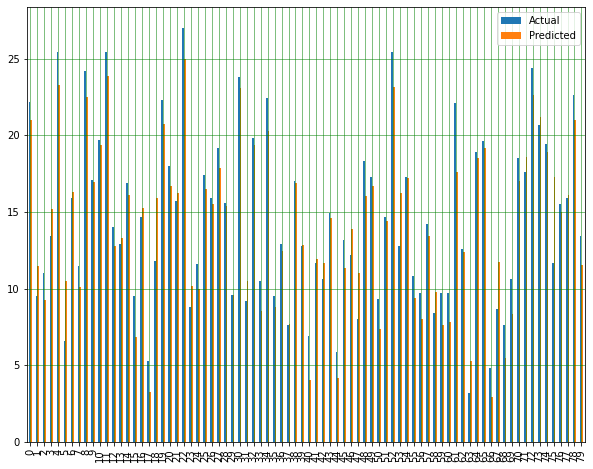

In [89]:
import matplotlib.pyplot as plt
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [91]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.4234540607737323
Mean Squared Error: 3.209015900140615
Root Mean Squared Error: 1.7913726301751445


In [94]:
print(data['Sales'].mean())

14.022500000000003
